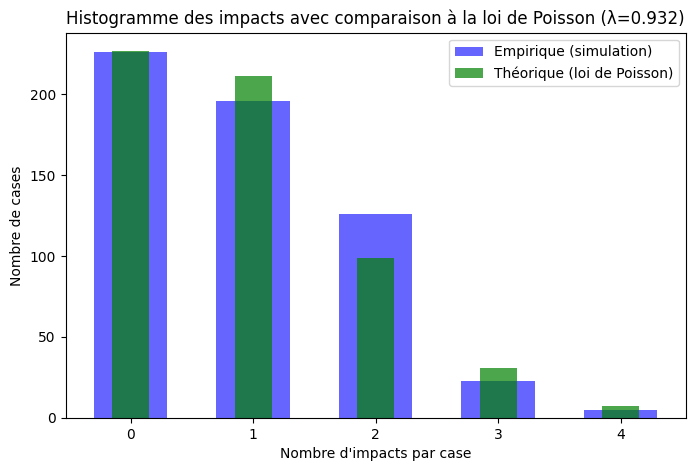

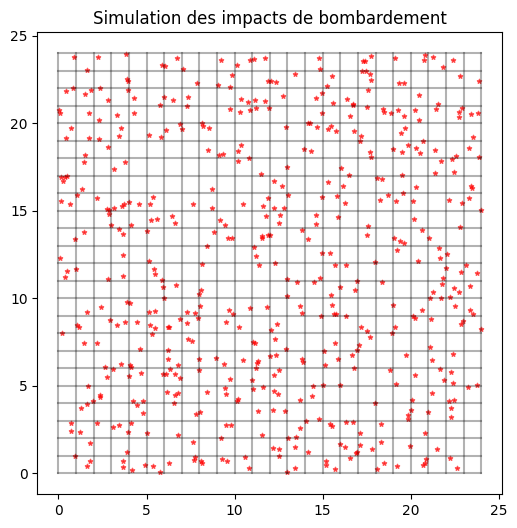

=== Analyse ===
Nombre total de cases : 576
Paramètre λ (moyenne par case) : 0.9323
Ecart-type théorique : 0.9656
Ecart-type empirique : 0.9189


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# ------------------------------
# Paramètres
# ------------------------------
ncases = 24               # nombre de cases par côté
nimpacts = 537            # nombre total d'impacts
N = ncases * ncases       # nombre total de cases
lam = nimpacts / N        # paramètre λ de la loi de Poisson

# ------------------------------
# a) Création de la zone
# ------------------------------

cx = np.arange(ncases + 1)
cy = np.arange(ncases + 1)
CX, CY = np.meshgrid(cx, cy)


# ------------------------------
# b) Bombardements
# ------------------------------
M = np.zeros((ncases, ncases), dtype=int)

# Générer les impacts
x_impacts, y_impacts = [], []
for _ in range(nimpacts):
    i = random.randint(0, ncases-1) + random.random()
    j = random.randint(0, ncases-1) + random.random()
    M[int(i),int(j)] += 1
    x_impacts.append(i)  # coordonnées pour affichage
    y_impacts.append(j)

# Nombre d'impacts par case (aplati en 1D)
M_flat = M.flatten()

# Histogramme empirique
valeurs, counts = np.unique(M_flat, return_counts=True)

plt.figure(figsize=(8,5))
plt.bar(valeurs, counts, width=0.6, color="blue", alpha=0.6, label="Empirique (simulation)")

# ------------------------------
# c) Loi de Poisson (sans scipy)
# ------------------------------
def poisson_pmf(k, lam):
    return math.exp(-lam) * (lam**k) / math.factorial(k)

k_vals = np.arange(0, max(valeurs)+1)
proba_theo = [poisson_pmf(k, lam) * N for k in k_vals]

plt.bar(k_vals, proba_theo, width=0.3, color="green", alpha=0.7, label="Théorique (loi de Poisson)")

plt.xlabel("Nombre d'impacts par case")
plt.ylabel("Nombre de cases")
plt.title(f"Histogramme des impacts avec comparaison à la loi de Poisson (λ={lam:.3f})")
plt.legend()
plt.show()

# Affichage de la carte des impacts
plt.figure(figsize=(6,6))
plt.plot(CX, CY, 'k', alpha=0.3)
plt.plot(CX.T, CY.T, 'k', alpha=0.3)
plt.scatter(x_impacts, y_impacts ,c="red", s=10, alpha=0.6, marker='*')
plt.title("Simulation des impacts de bombardement")
plt.show()

# ------------------------------
# d) Ecart-type
# ------------------------------
sigma_theo = math.sqrt(lam)
sigma_emp = np.std(M_flat)

print("=== Analyse ===")
print(f"Nombre total de cases : {N}")
print(f"Paramètre λ (moyenne par case) : {lam:.4f}")
print(f"Ecart-type théorique : {sigma_theo:.4f}")
print(f"Ecart-type empirique : {sigma_emp:.4f}")


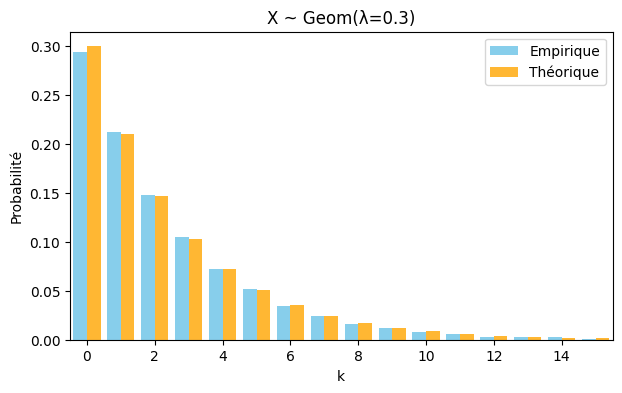

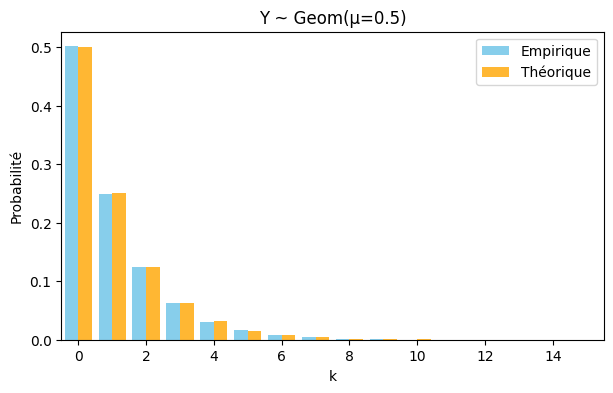

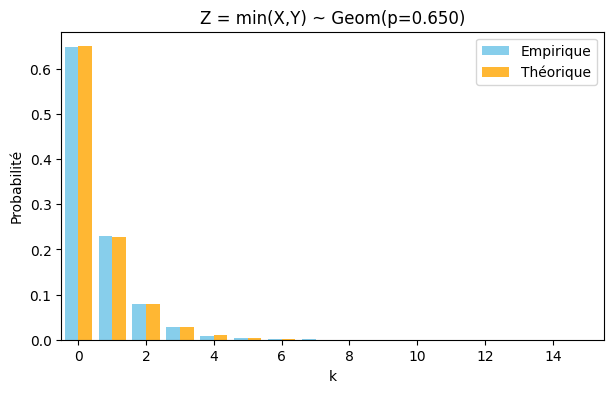

=== Statistiques (empirique vs théorique) ===

X ~ Geom(λ=0.3) : E_emp=2.3361, E_theo=2.3333;  std_emp=2.7606, std_theo=2.7889
Y ~ Geom(μ=0.5)  : E_emp=0.9942, E_theo=1.0000;  std_emp=1.4010, std_theo=1.4142
Z = min(X,Y)      : E_emp=0.5373, E_theo=0.5385;  std_emp=0.9072, std_theo=0.9102


In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

# -----------------------------
# Paramètres
# -----------------------------
lam = 0.3
mu  = 0.5
p = lam + mu - lam*mu           # paramètre théorique de Z = min(X,Y)
Nsim = 20000                    # nombre de simulations
max_k_plot = 15                 # jusqu'où tracer les histogrammes

# -----------------------------
# Fonction pour simuler Geom(p)
# (nombre d'échecs avant 1er succès)
# -----------------------------
def LoiGeometrique_param(p):
    k = 0
    while random.random() >= p:
        k += 1
    return k

def sim_geometric(p, N):
    return np.array([LoiGeometrique_param(p) for _ in range(N)])

# -----------------------------
# Simulations
# -----------------------------
X = sim_geometric(lam, Nsim)
Y = sim_geometric(mu, Nsim)
Z = np.minimum(X, Y)

# -----------------------------
# Calculs empiriques
# -----------------------------
def empirical_freq(data, K):
    counts = np.bincount(data, minlength=K+1)
    freqs = counts / data.size
    return freqs[:K+1]

K = max_k_plot
freqs_X = empirical_freq(X, K)
freqs_Y = empirical_freq(Y, K)
freqs_Z = empirical_freq(Z, K)

# -----------------------------
# Loi théorique
# -----------------------------
def geom_pmf(k, p):
    return (1-p)**k * p

k_vals = np.arange(0, K+1)
pmf_X = [geom_pmf(k, lam) for k in k_vals]
pmf_Y = [geom_pmf(k, mu)  for k in k_vals]
pmf_Z = [geom_pmf(k, p)   for k in k_vals]

# -----------------------------
# Affichage comparatif
# -----------------------------
def plot_compare(k_vals, freq_emp, pmf_theo, title):
    width = 0.4
    plt.figure(figsize=(7,4))
    plt.bar(k_vals - width/2, freq_emp, width=width, color='skyblue', label='Empirique')
    plt.bar(k_vals + width/2, pmf_theo, width=width, color='orange', alpha=0.8, label='Théorique')
    plt.xlim(-0.5, K+0.5)
    plt.xlabel('k')
    plt.ylabel('Probabilité')
    plt.title(title)
    plt.legend()
    plt.show()

plot_compare(k_vals, freqs_X, pmf_X, f'X ~ Geom(λ={lam})')
plot_compare(k_vals, freqs_Y, pmf_Y, f'Y ~ Geom(μ={mu})')
plot_compare(k_vals, freqs_Z, pmf_Z, f'Z = min(X,Y) ~ Geom(p={p:.3f})')

# -----------------------------
# Statistiques empiriques vs théoriques
# -----------------------------
def stats_theo_geom(p):
    E = (1-p)/p
    Var = (1-p)/(p**2)
    return E, math.sqrt(Var)

E_X_emp, s_X_emp = X.mean(), X.std(ddof=0)
E_Y_emp, s_Y_emp = Y.mean(), Y.std(ddof=0)
E_Z_emp, s_Z_emp = Z.mean(), Z.std(ddof=0)

E_X_th, s_X_th = stats_theo_geom(lam)
E_Y_th, s_Y_th = stats_theo_geom(mu)
E_Z_th, s_Z_th = stats_theo_geom(p)

print("=== Statistiques (empirique vs théorique) ===\n")
print(f"X ~ Geom(λ={lam}) : E_emp={E_X_emp:.4f}, E_theo={E_X_th:.4f};  std_emp={s_X_emp:.4f}, std_theo={s_X_th:.4f}")
print(f"Y ~ Geom(μ={mu})  : E_emp={E_Y_emp:.4f}, E_theo={E_Y_th:.4f};  std_emp={s_Y_emp:.4f}, std_theo={s_Y_th:.4f}")
print(f"Z = min(X,Y)      : E_emp={E_Z_emp:.4f}, E_theo={E_Z_th:.4f};  std_emp={s_Z_emp:.4f}, std_theo={s_Z_th:.4f}")
